In [104]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [105]:
import numpy as np
import torch
from torchvision import transforms
import h5py
import matplotlib.pyplot as plt

In [106]:
train_file = "/content/drive/MyDrive/Facial_expression_recognition/shuffled_train_data.h5"
test_file = "/content/drive/MyDrive/Facial_expression_recognition/shuffled_test_data.h5"

In [107]:
with h5py.File(train_file, 'r') as h5_file:
  train_features = h5_file['features'][:]
  train_labels = h5_file['labels'][:]

In [108]:
train_features = torch.from_numpy(train_features).unsqueeze(1).float()

In [109]:
len(train_features)

28709

In [110]:
augmentations = transforms.Compose([
    transforms.RandomRotation(degrees=20),          # Rotate randomly
    transforms.RandomResizedCrop(size=48, scale=(0.8, 1.0)),  # Crop and resize
    transforms.RandomHorizontalFlip(p=0.5),         # Flip horizontally
    transforms.GaussianBlur(kernel_size=(3, 3)),    # Add Gaussian blur
    transforms.Normalize(mean=[0.5], std=[0.5]),   # Normalize grayscale values
])

In [111]:
augmented_data = []
augmented_labels = []

for i in range(len(train_features)):
    image = train_features[i]  # Get the image tensor
    label = train_labels[i]     # Get the label
    augmented_image = augmentations(image)  # Apply transformations
    augmented_data.append(augmented_image)
    augmented_labels.append(label)

# Convert lists back to tensors
augmented_data = torch.stack(augmented_data)
augmented_labels = torch.tensor(augmented_labels)

print("Augmented data shape:", augmented_data.shape)  # Should be (28000, 1, 48, 48)
print("Augmented labels shape:", augmented_labels.shape)  # Should be (28000,)

Augmented data shape: torch.Size([28709, 1, 48, 48])
Augmented labels shape: torch.Size([28709])


tensor(6)

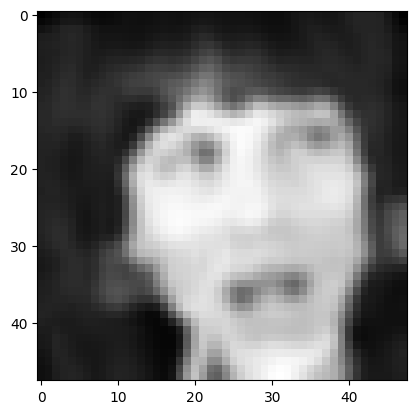

In [112]:
image = augmented_data[0]
plt.imshow(image.squeeze(0),cmap = "gray")
augmented_labels[0]

In [113]:
augmented_data = augmented_data.squeeze(1)

In [114]:
augmented_data.shape

torch.Size([28709, 48, 48])

In [116]:
import h5py
import numpy as np


# Convert lists to numpy arrays
augmented_data = np.array(augmented_data, dtype=np.float32)  # Shape: (N, 1, 48, 48)
augmented_labels = np.array(augmented_labels, dtype=np.int64)    # Shape: (N,)

# Save to HDF5
hdf5_file_path = "augmented_fer_data.h5"
with h5py.File(hdf5_file_path, "w") as hdf5_file:
    hdf5_file.create_dataset("images", data=augmented_data)
    hdf5_file.create_dataset("labels", data=augmented_labels)

print(f"Augmented data saved to {hdf5_file_path}")


Augmented data saved to augmented_fer_data.h5
